<a href="https://colab.research.google.com/github/andreac941/ComputerVision-Eq3/blob/main/7.2_AlgorExtraccion_caracteristicas_HarrisDetector_Eq10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **7.2 Google Colab - Algoritmos de extracción de Caraterísticas - Harris Detector**
### **Equipo 10:**
##### Carlos Roberto Torres Ferguson - A01215432 
##### Andrea Carolina Treviño Garza - A01034993 
##### Julio Adrián Quintana Gracia - A01793661 
##### Pablo Alejandro Colunga Vázquez  - A01793671

# 7. Harris Edge & Corner Detection

## Table of Contents
1. [Libraries](#libraries)
2. [Color image to Grayscale conversion](#grayscale)
3. [Spatial derivative calculation](#spatial)
4. [Structure tensor setup](#tensor)
5. [Harris response calculation](#response)
6. [Find edges and corners using R](#find)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from scipy.ndimage.filters import convolve

## 1. Color to Grayscale <a class="anchor" id="grayscale" ></a>

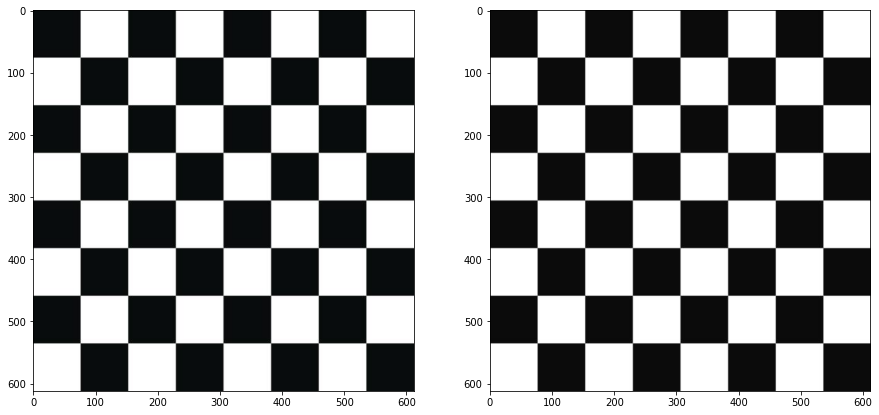

In [6]:
img = cv2.imread('/content/chessboard.jpg')
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")
plt.show()

## 2. Spatial derivative calculation <a class="anchor" id="spatial" ></a>

In [4]:
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(img_gray)
I_y = gradient_y(img_gray)

## 3. Structure tensor setup <a class="anchor" id="tensor" ></a>

In [5]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g


Ixx = convolve(I_x**2, gaussian_kernel(3, 1))
Ixy = convolve(I_y*I_x, gaussian_kernel(3, 1))
Iyy = convolve(I_y**2, gaussian_kernel(3, 1))

## 4. Harris response calculation <a class="anchor" id="response" ></a>

In [7]:
k = 0.05

# determinant
detA = Ixx * Iyy - Ixy ** 2

# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

In [8]:
img_gray.shape

(612, 612)

In [9]:
window_size = 3
offset = window_size//2
width, height = img_gray.shape

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])

In [10]:
#Find determinant and trace, use to get corner response
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
r = det - k*(trace**2)

## 5. Find edges and corners using R <a class="anchor" id="find" ></a>

In [11]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

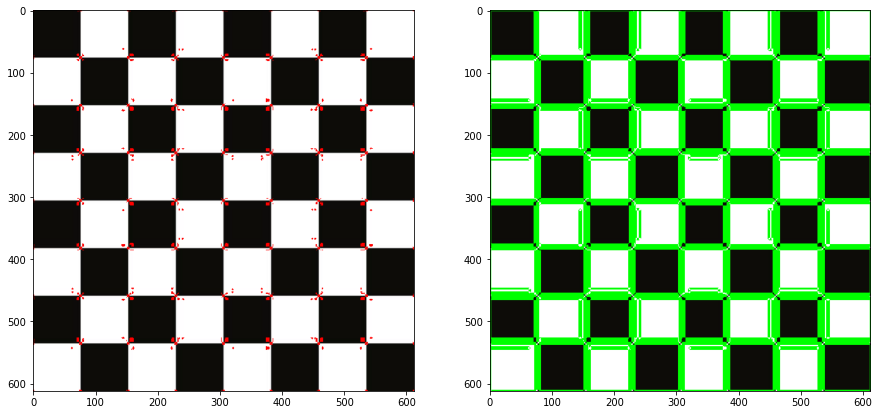

In [13]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_copy_for_corners, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img_copy_for_edges, cmap="gray")
plt.show()

#**Ejercicio**

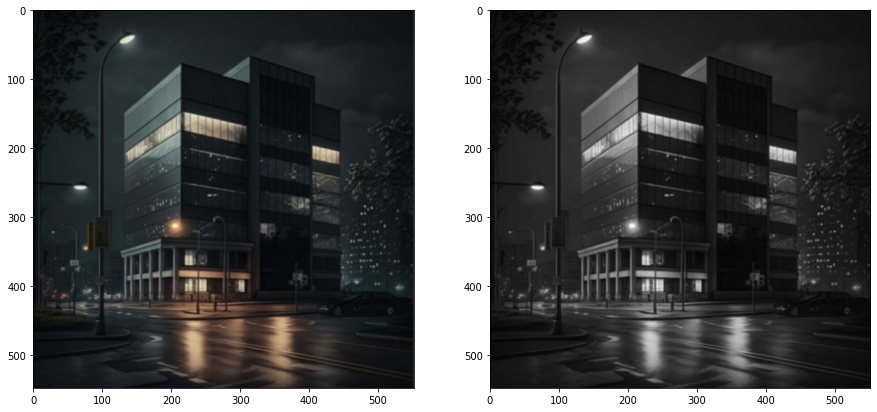

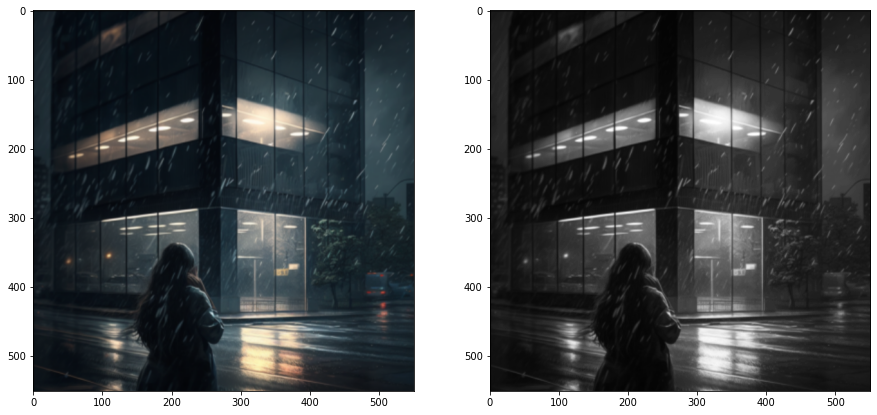

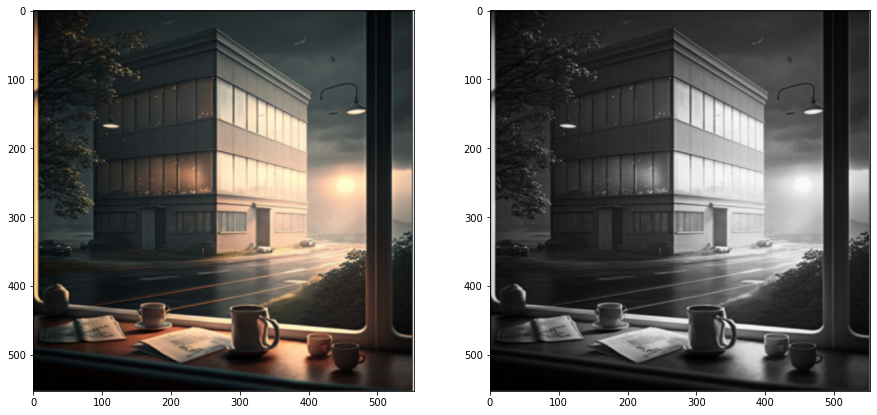

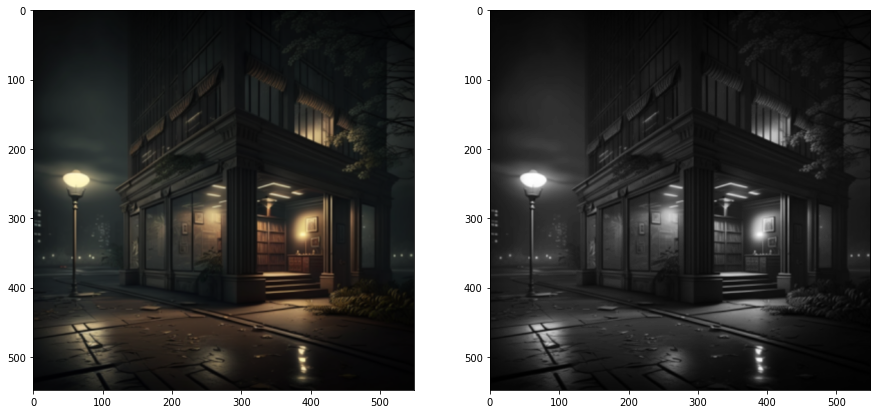

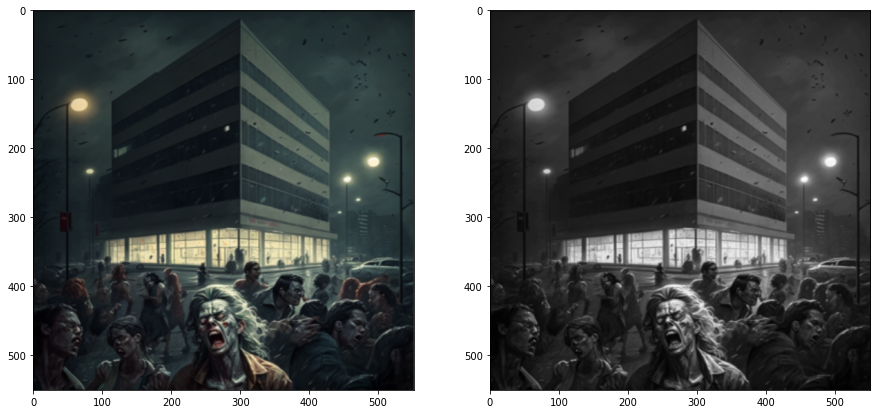

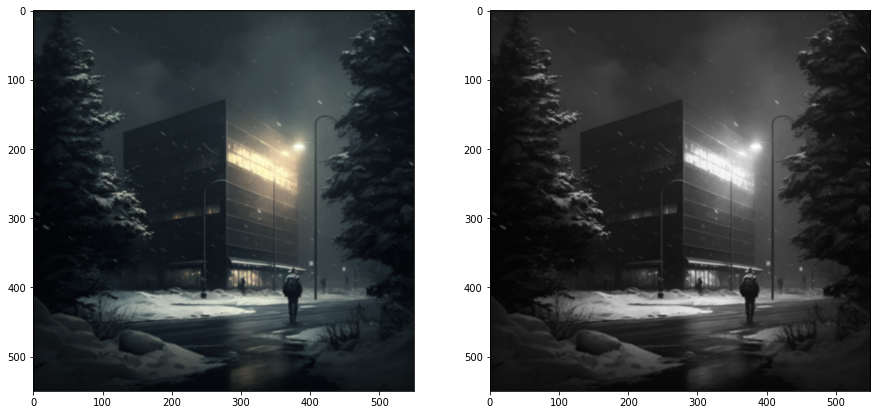

In [14]:
# img#1
img_1 = cv2.imread('/content/cv1.png')
img_color_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color_1)
plt.subplot(1, 2, 2)
plt.imshow(img_gray_1, cmap="gray")

# img#2
img_2 = cv2.imread('/content/cv2.png')
img_color_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
img_gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color_2)
plt.subplot(1, 2, 2)
plt.imshow(img_gray_2, cmap="gray")

# img#3
img_3 = cv2.imread('/content/cv3.png')
img_color_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)
img_gray_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color_3)
plt.subplot(1, 2, 2)
plt.imshow(img_gray_3, cmap="gray")

# img#4
img_4 = cv2.imread('/content/cv4.png')
img_color_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB)
img_gray_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color_4)
plt.subplot(1, 2, 2)
plt.imshow(img_gray_4, cmap="gray")

# img#5
img_5 = cv2.imread('/content/cv5.png')
img_color_5 = cv2.cvtColor(img_5, cv2.COLOR_BGR2RGB)
img_gray_5 = cv2.cvtColor(img_5, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color_5)
plt.subplot(1, 2, 2)
plt.imshow(img_gray_5, cmap="gray")

# img#6
img_6 = cv2.imread('/content/cv6.png')
img_color_6 = cv2.cvtColor(img_6, cv2.COLOR_BGR2RGB)
img_gray_6 = cv2.cvtColor(img_6, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color_6)
plt.subplot(1, 2, 2)
plt.imshow(img_gray_6, cmap="gray")

In [15]:
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [31]:
def harris_edge_corner_detection(img_gray, img):
  # Spatial derivative calculation
  I_x = gradient_x(img_gray)
  I_y = gradient_y(img_gray)

  # Structure tensor setup
  Ixx = convolve(I_x**2, gaussian_kernel(3, 1)) 
  Ixy = convolve(I_y*I_x, gaussian_kernel(3, 1))
  Iyy = convolve(I_y**2, gaussian_kernel(3, 1))

  # Harris response calculation
  k = 0.05

  # determinant
  detA = Ixx * Iyy - Ixy ** 2

  # trace
  traceA = Ixx + Iyy
      
  harris_response = detA - k * traceA ** 2


  window_size = 3
  offset = window_size//2
  width, height = img_gray.shape

  for y in range(offset, height-offset):
      for x in range(offset, width-offset):
          Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
          Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
          Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])

  #Find determinant and trace, use to get corner response
  det = (Sxx * Syy) - (Sxy**2)
  trace = Sxx + Syy
  r = det - k*(trace**2)

  # Finding corners and edgers using R
  img_copy_for_corners = np.copy(img)
  img_copy_for_edges = np.copy(img)

  for rowindex, response in enumerate(harris_response):
      for colindex, r in enumerate(response):
          if r > 0:
              # this is a corner
              img_copy_for_corners[rowindex, colindex] = [255,0,0]
          elif r < 0:
              # this is an edge
              img_copy_for_edges[rowindex, colindex] = [0,255,0]


  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.imshow(img_copy_for_corners, cmap="gray")
  plt.subplot(1, 2, 2)
  plt.imshow(img_copy_for_edges, cmap="gray")

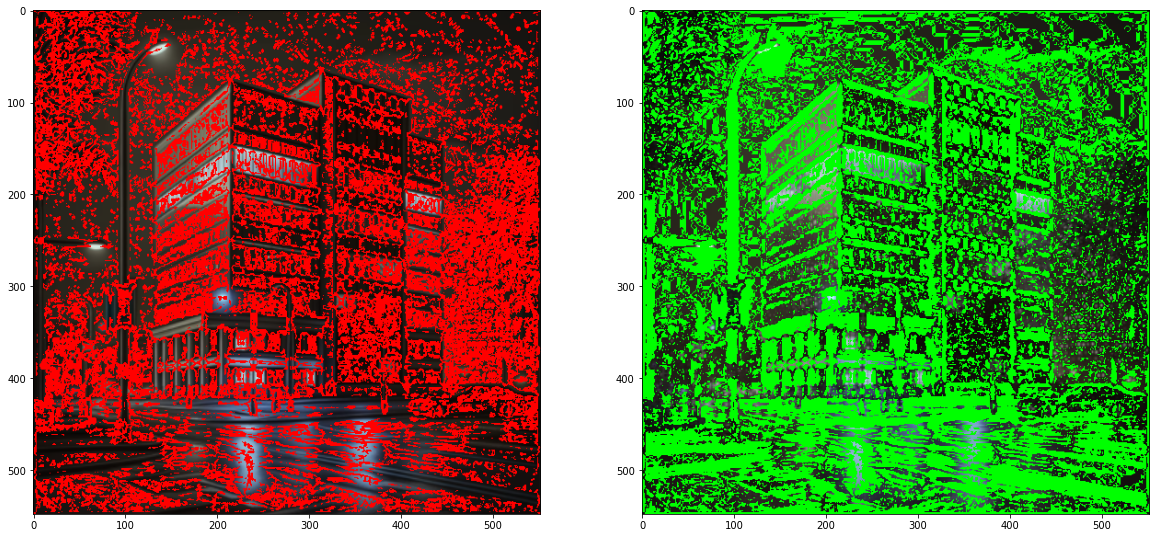

In [32]:
harris_edge_corner_detection(img_gray_1, img_1)

##**Img#1**
* **Esquinas (rojo):** se observa que algoritmo de Harris detecta muchas más esquinas de la esperadas. Por ejemplo en las nubes, que tienes contornos muy suaves y no tan distinguibles o en la luces reflejadas en el suelo. Mientras en el edificio central de la foto con sus ventanas sí se detectaron esquinas relevantes. Pero nuevamente detectó más esquinas de las esperadas en secciones que se perciben casi lisas entre las ventanas del edificio principal.
* **Bordes (verde):** en el caso de los bordes, igualmente detecta muchos más líneas de las esperadas en el fondo de nubes, luces y reflejos de la ciudad. Mientras que las líneas que claramente se busca observar como los contornos de los eficios y ventanas se ven discontinuos.

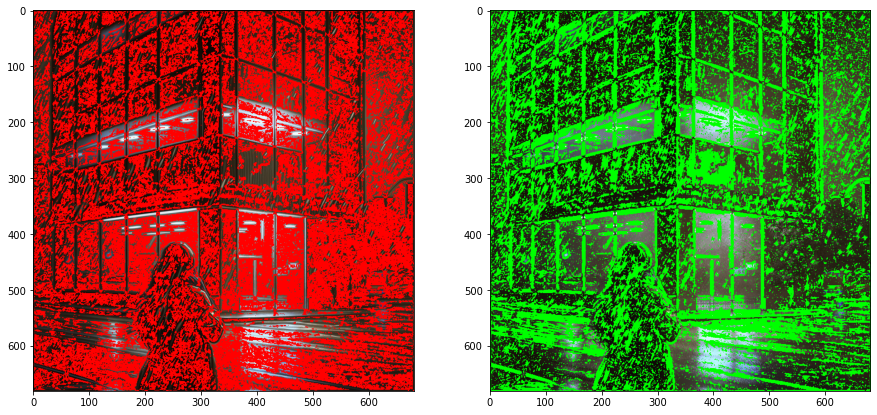

In [ ]:
harris_edge_corner_detection(img_gray_2, img_2)

##**Img#2**
* **Esquinas (rojo):** en esta imagen imagen se observa claramente el contraste, donde practicamente todo lo que que el algoritmo no está detectando como esquina lo está clasificando con borde. Bordes de ventanas, puertas y edificios se aprecian con facilidad. Pero secciones que se perciben lisas y sin bordes, las marca en rojo el algoritmo.
* **Bordes (verde):** para los bordes se identifican las diagonales de la lluvia (característca de interés en la imagen para comparación), las líneas de las calles, puertas y ventanas de edificio.

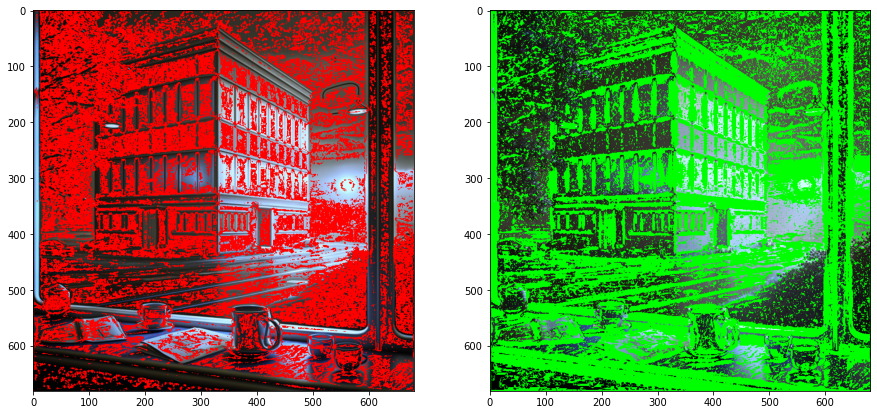

In [ ]:
harris_edge_corner_detection(img_gray_3, img_3)

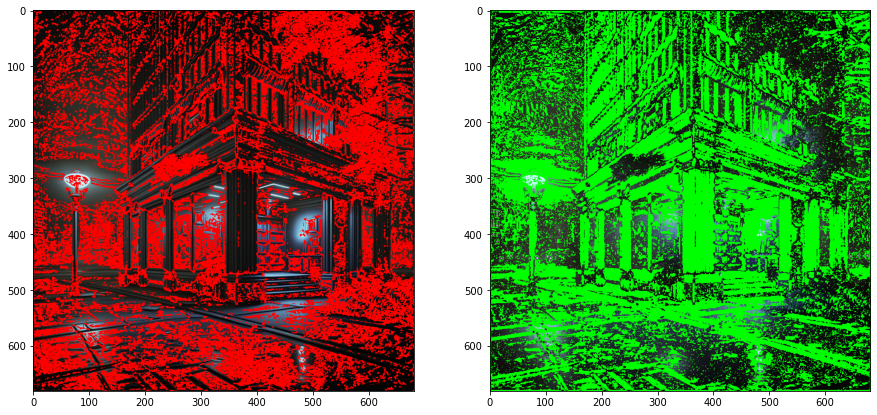

In [ ]:
harris_edge_corner_detection(img_gray_4, img_4)

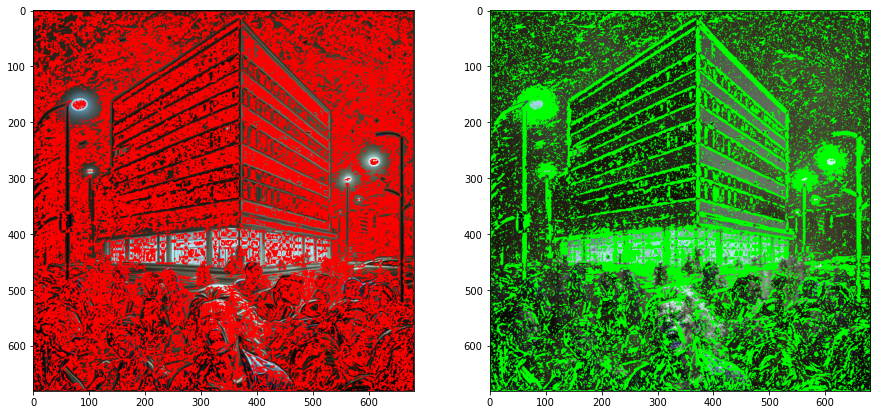

In [ ]:
harris_edge_corner_detection(img_gray_5, img_5)

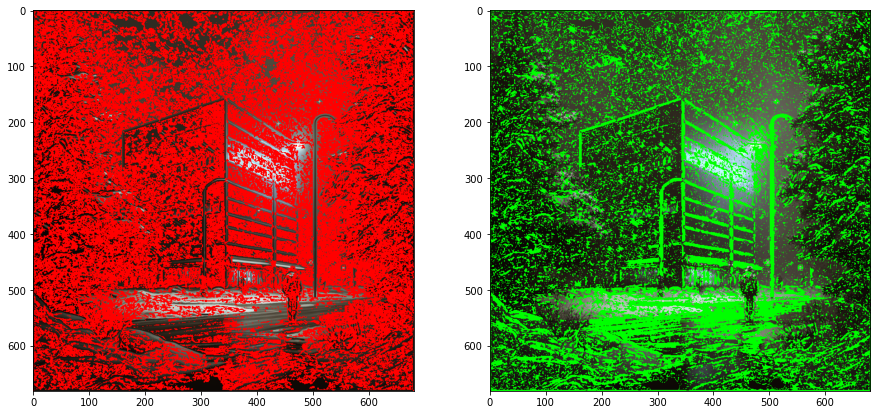

In [ ]:
harris_edge_corner_detection(img_gray_6, img_6)

* En general observamos que cuando tienen mucho nivel de detalle las imágenes, con mas profundidades y variaciones de colores y tonalidades, hacen que algoritmo identifica más bordes y esquinas de las realmente se esperan. La recomendación sería utilizar fotos con menor nivel de detalle y cambios en luces/tonalidades para observar un mejor rendimiento en el algoritmo.